# Netflix 

In [1]:
%load_ext autoreload
%autoreload 2

## Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Netflix.data import Movies

## Data Wrangling

In [3]:
movies = Movies()

In [4]:
# pd.read_csv('../raw_data/data.csv')

In [5]:
# df = movies.get_data()

In [6]:
# df

In [7]:
# number of unique movies
# df['movie'].nunique()

In [8]:
data = pd.read_csv('../raw_data/data.csv')

## Train dataset_250

In [9]:
df_250 = pd.read_csv('../raw_data/250_train.csv')

In [10]:
df_250.head(3)

,movie_id,Year_x,Name,mean,count,Title,Year_y,Rated,Released,Runtime,...,BoxOffice,Production,Website,Response,Internet Movie Database,Rotten Tomatoes,Metacritic,Error,totalSeasons,Ratings
0,5296,2003.0,Camp,2.982863,6419,Camp,2003,PG-13,29 Aug 2003,114 min,...,"$1,629,862",NaN,NaN,True,6.2/10,64%,55/100,NaN,NaN,NaN
1,12062,2002.0,The Wiggles: Wiggly Safari,3.333333,123,The Wiggles: Wiggly Safari,2002,Not Rated,03 Sep 2002,52 min,...,NaN,NaN,NaN,True,6.6/10,NaN,NaN,NaN,NaN,NaN
2,16079,2003.0,Dark Waters,2.269091,275,Dark Waters,2019,PG-13,06 Dec 2019,126 min,...,"$11,136,084","Killer Films, Participant Media",NaN,True,7.6/10,89%,73/100,NaN,NaN,NaN


### Runtime

In [11]:
# data type
df_250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_id                 148 non-null    int64  
 1   Year_x                   148 non-null    float64
 2   Name                     148 non-null    object 
 3   mean                     148 non-null    float64
 4   count                    148 non-null    int64  
 5   Title                    148 non-null    object 
 6   Year_y                   148 non-null    object 
 7   Rated                    132 non-null    object 
 8   Released                 137 non-null    object 
 9   Runtime                  146 non-null    object 
 10  Genre                    148 non-null    object 
 11  Director                 134 non-null    object 
 12  Writer                   129 non-null    object 
 13  Actors                   148 non-null    object 
 14  Plot                     1

In [12]:
# null values
df_250.isnull().sum()

movie_id                     0
Year_x                       0
Name                         0
mean                         0
count                        0
Title                        0
Year_y                       0
Rated                       16
Released                    11
Runtime                      2
Genre                        0
Director                    14
Writer                      19
Actors                       0
Plot                         2
Language                     1
Country                      0
Awards                      58
Poster                       0
Metascore                   85
imdbRating                   2
imdbVotes                    2
imdbID                       0
Type                         0
DVD                         41
BoxOffice                   76
Production                  56
Website                    148
Response                     0
Internet Movie Database      2
Rotten Tomatoes             30
Metacritic                  85
Error   

In [14]:
# fill nan
df_250['Runtime'] = df_250['Runtime'].fillna(0)

# remove ' min', convert to int and replace zero for the mean
df_250['Runtime'] = df_250['Runtime'].apply(lambda x: int(str(x).replace(' min', '')))
df_250['Runtime'] = df_250['Runtime'].replace(0, df_250['Runtime'].mean())

In [15]:
df_250['Runtime'].describe()

count    148.000000
mean     109.171841
std       55.334784
min       17.000000
25%       90.000000
50%      102.000000
75%      119.000000
max      629.000000
Name: Runtime, dtype: float64

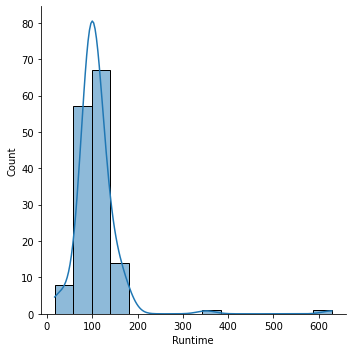

In [16]:
# histogram - complete dataset
total_runtime = df_250['Runtime'].reset_index()
sns.displot(x="Runtime", data=total_runtime, bins=15, kde=True);

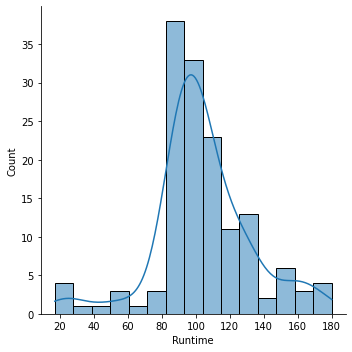

In [17]:
# histogram - movies up to 200 min (~3h30)
runtime_200min = df_250[df_250['Runtime'] < 200]['Runtime'].reset_index()
sns.displot(x="Runtime", data=runtime_200min, bins=15, kde=True);

In [18]:
runtime_200min['Runtime'].describe()

count    146.000000
mean     103.948167
std       28.397939
min       17.000000
25%       90.000000
50%      101.500000
75%      118.750000
max      180.000000
Name: Runtime, dtype: float64

In [24]:
# fill nan
df_250['Internet Movie Database'] = df_250['Internet Movie Database'].fillna(0)

# remove '/10', convert to float and replace zero for the mean
df_250['Internet Movie Database'] = df_250['Internet Movie Database'].apply(lambda x: float(str(x).replace('/10', '')))
df_250['Internet Movie Database'] = df_250['Internet Movie Database'].replace(0, df_250['Internet Movie Database'].mean())

In [26]:
# fill nan
df_250['Rotten Tomatoes'] = df_250['Rotten Tomatoes'].fillna(0)

# remove '/10', convert to float and replace zero for the mean
df_250['Rotten Tomatoes'] = df_250['Rotten Tomatoes'].apply(lambda x: float(str(x).replace('%', '')))
df_250['Rotten Tomatoes'] = df_250['Rotten Tomatoes'].replace(0, df_250['Rotten Tomatoes'].mean())

In [39]:
runtime_scores = df_250[['Runtime', 'Internet Movie Database', 'Rotten Tomatoes', 'mean']]
runtime_scores.corr()

,Runtime,Internet Movie Database,Rotten Tomatoes,mean
Runtime,1.000000,0.191978,0.070927,0.214298
Internet Movie Database,0.191978,1.000000,0.567394,0.660520
Rotten Tomatoes,0.070927,0.567394,1.000000,0.328607
mean,0.214298,0.660520,0.328607,1.000000
